In [1]:
# !pip install pyod
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from pyod.models.iforest import IForest
from pyod.models.pca import PCA
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from pyod.models.cblof import CBLOF

from sklearn.neighbors import KernelDensity
from scipy.stats import boxcox
from sklearn.model_selection import ParameterGrid
import shap
import seaborn as sns
sns.set_style('white')

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
#경로 지정
source = pd.read_csv("../Preprocessing/최종_데이터셋.csv", encoding='euc-kr')
data = source.copy()

In [5]:
data.columns

Index(['LOT번호', '검사차수', '작업명', '공정코드', '설비번호', '단위중량(kg)', '투입중량(kg)',
       '염색길이(m)', '투입중량/길이', '투입중량/액량', '공정진행시간(%)', '진행온도', '포속1', '포속3',
       '포속4', '이상치 여부'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32608 entries, 0 to 32607
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOT번호      32608 non-null  object 
 1   검사차수       32608 non-null  object 
 2   작업명        32608 non-null  object 
 3   공정코드       32608 non-null  object 
 4   설비번호       32608 non-null  object 
 5   단위중량(kg)   32608 non-null  float64
 6   투입중량(kg)   32608 non-null  float64
 7   염색길이(m)    32608 non-null  float64
 8   투입중량/길이    32608 non-null  float64
 9   투입중량/액량    32608 non-null  float64
 10  공정진행시간(%)  32608 non-null  float64
 11  진행온도       32608 non-null  float64
 12  포속1        32608 non-null  int64  
 13  포속3        32608 non-null  int64  
 14  포속4        32608 non-null  int64  
 15  이상치 여부     32608 non-null  int64  
dtypes: float64(7), int64(4), object(5)
memory usage: 4.0+ MB


In [7]:
data.head()

,LOT번호,검사차수,작업명,공정코드,설비번호,단위중량(kg),투입중량(kg),염색길이(m),투입중량/길이,투입중량/액량,공정진행시간(%),진행온도,포속1,포속3,포속4,이상치 여부
0,F2201280039,0,원단검사,F12-1203,FCM08,324.0,44.6,41.0,1.087805,0.0446,0.19,10.9,0,0,0,0
1,F2201280039,0,원단검사,F12-1203,FCM08,324.0,44.6,41.0,1.087805,0.0446,0.39,10.3,16,16,1,0
2,F2201280039,0,원단검사,F12-1203,FCM08,324.0,44.6,41.0,1.087805,0.0446,0.58,10.3,68,16,1,0
3,F2201280039,0,원단검사,F12-1203,FCM08,324.0,44.6,41.0,1.087805,0.0446,0.77,10.2,69,138,2,0
4,F2201280039,0,원단검사,F12-1203,FCM08,324.0,44.6,41.0,1.087805,0.0446,0.97,10.8,69,138,2,0


In [8]:
data.describe()

,단위중량(kg),투입중량(kg),염색길이(m),투입중량/길이,투입중량/액량,공정진행시간(%),진행온도,포속1,포속3,포속4,이상치 여부
count,32608.000000,32608.000000,32608.000000,32608.000000,32608.000000,32608.000000,32608.000000,32608.000000,32608.000000,32608.000000,32608.000000
mean,449.097675,137.233630,246.525699,4.898244,0.067119,49.790863,84.804809,68.333936,118.575012,99.150699,0.067867
std,162.231151,87.663253,379.271659,13.822097,0.018183,28.825862,31.287799,65.452429,286.770313,123.118641,0.251521
min,146.000000,19.800000,2.000000,0.117125,0.021400,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,324.000000,60.800000,24.000000,0.489701,0.053300,24.820000,67.200000,39.000000,47.000000,20.000000,0.000000
50%,460.000000,113.800000,87.000000,1.087805,0.066125,49.635000,83.400000,65.000000,81.000000,67.000000,0.000000
75%,560.000000,189.200000,301.000000,3.890909,0.078300,74.640000,112.400000,87.000000,108.000000,129.000000,0.000000
max,1150.000000,368.000000,1600.000000,140.000000,0.110150,100.000000,137.400000,2179.000000,6415.000000,1057.000000,1.000000


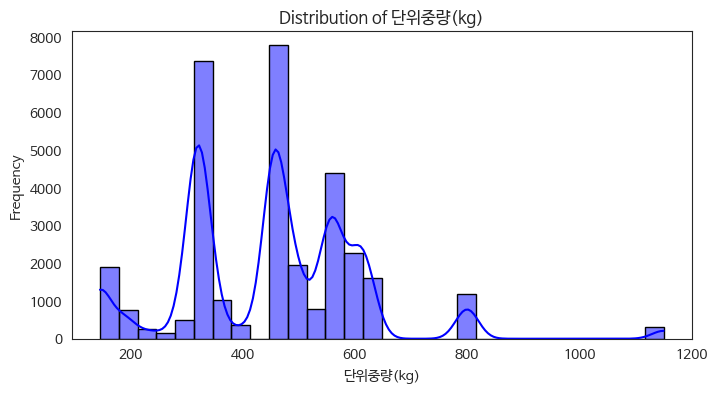

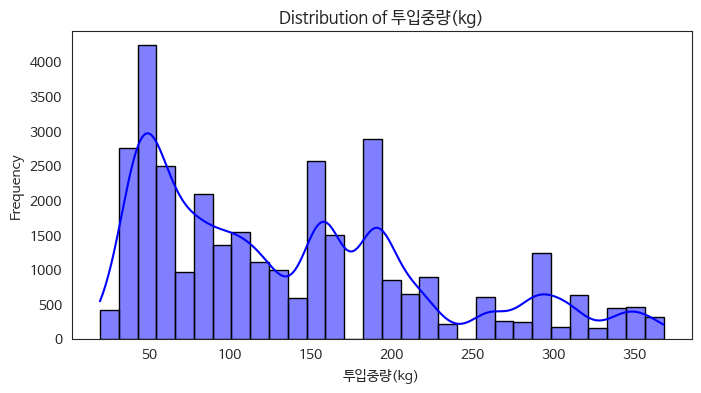

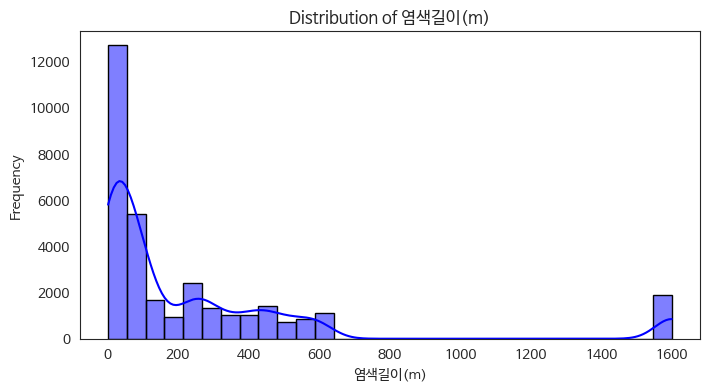

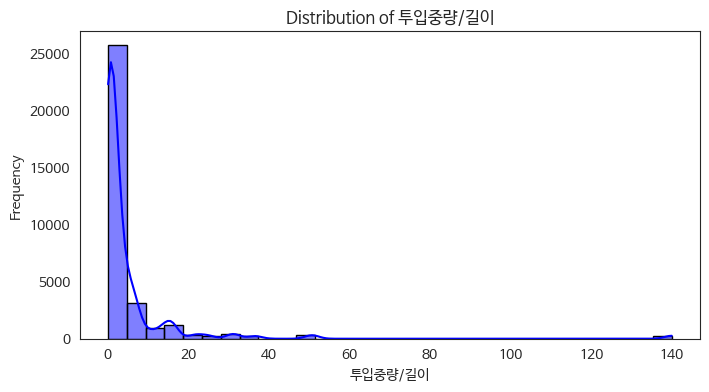

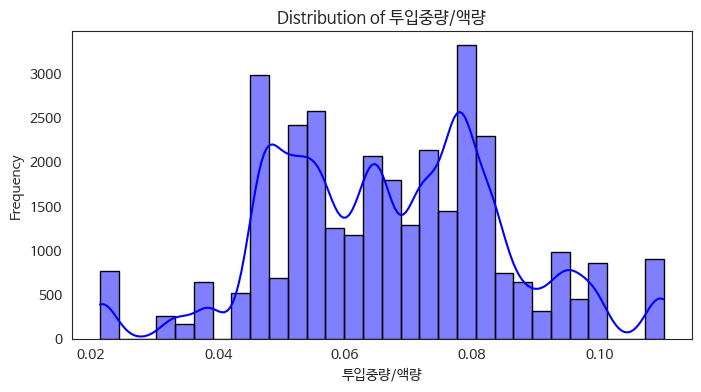

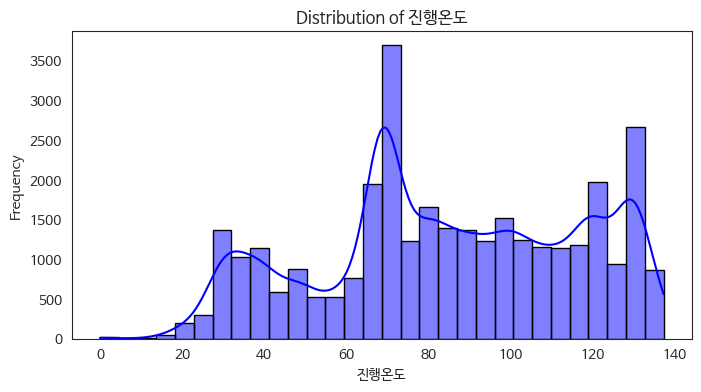

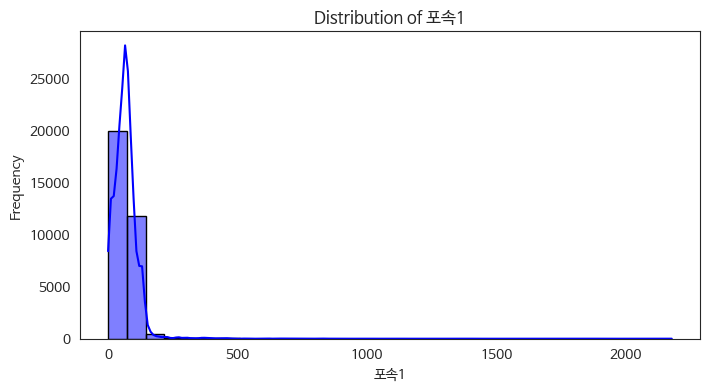

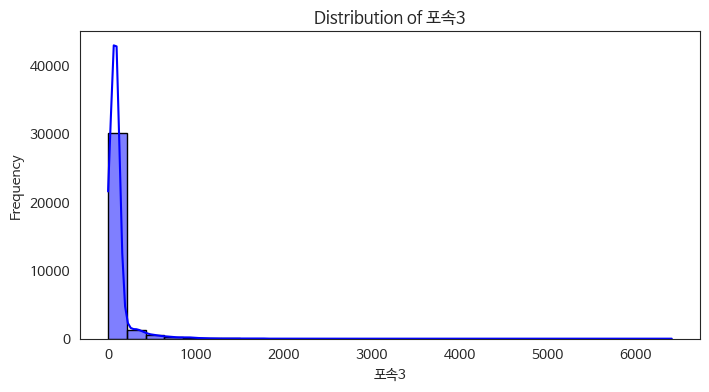

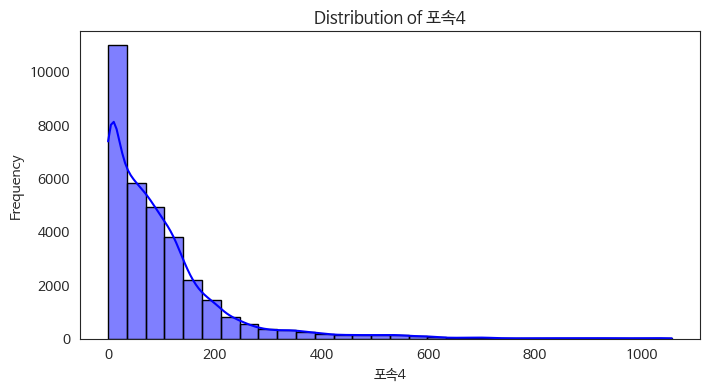

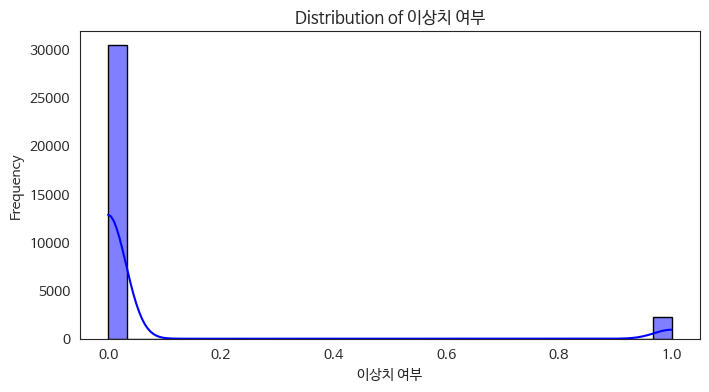

In [ ]:
numerical_columns = [
    '단위중량(kg)', '투입중량(kg)', '염색길이(m)',
    '투입중량/길이', '투입중량/액량',
    '진행온도','포속1','포속3', '포속4',  '이상치 여부'
]


for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], bins=30, kde=True, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(False)
    plt.show()

Box-Cox transformation

In [ ]:
columns_to_transform = [ '염색길이(m)', '투입중량/길이','포속1','포속3', '포속4' ]

data = data.copy()

for column in columns_to_transform:
    if (data[column] <= 0).any():
        shift = np.abs(data[column].min()) + 1
        data[column] = data[column] + shift

    data[column], _ = boxcox(data[column])

print(data.head())

   단위중량(kg)  투입중량(kg)   염색길이(m)   투입중량/길이  투입중량/액량  진행온도        포속1       포속3  \
0     324.0      44.6  4.249466  0.083573   0.0446  10.9   0.000000  0.000000   
1     324.0      44.6  4.249466  0.083573   0.0446  10.3   5.083598  4.066015   
2     324.0      44.6  4.249466  0.083573   0.0446  10.3  10.494168  4.066015   
3     324.0      44.6  4.249466  0.083573   0.0446  10.2  10.565992  9.488005   
4     324.0      44.6  4.249466  0.083573   0.0446  10.8  10.565992  9.488005   

        포속4  이상치 여부  
0  0.000000       0  
1  0.761401       0  
2  0.761401       0  
3  1.276629       0  
4  1.276629       0  


In [9]:
data1=data[['LOT번호','검사차수','작업명','공정코드','설비번호', '공정진행시간(%)']]

In [10]:
data=data[['단위중량(kg)', '투입중량(kg)', '염색길이(m)', '투입중량/길이', '투입중량/액량', '진행온도', '포속1',
       '포속3', '포속4', '이상치 여부']]

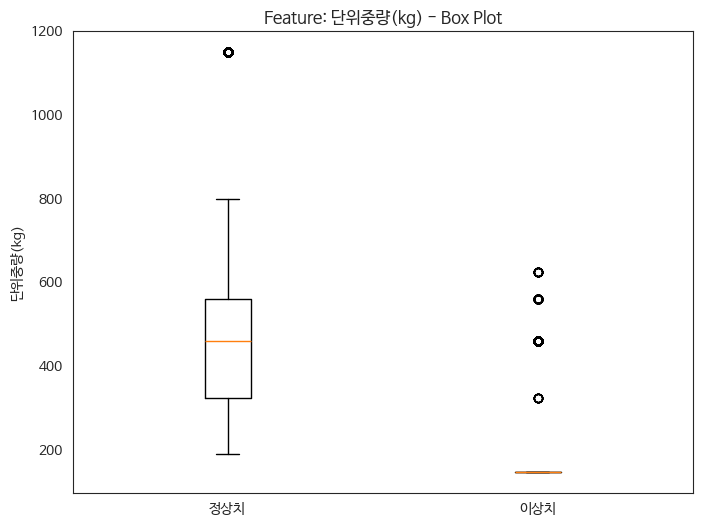

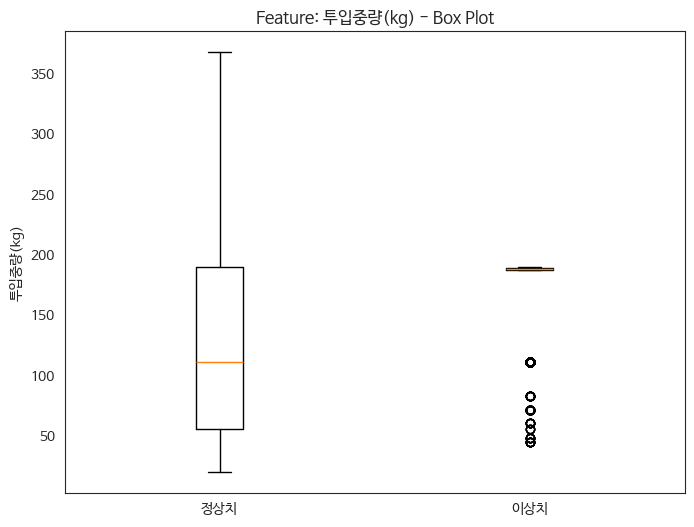

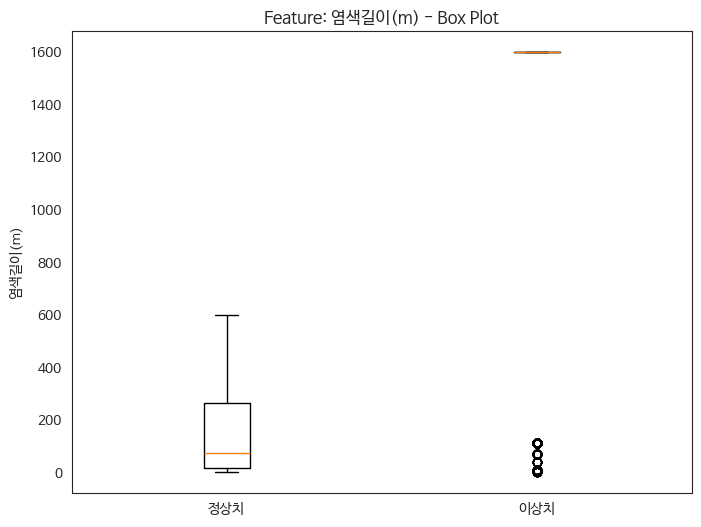

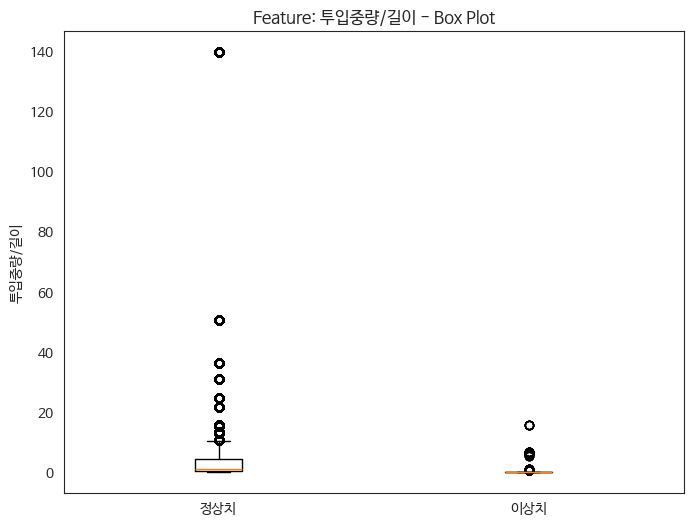

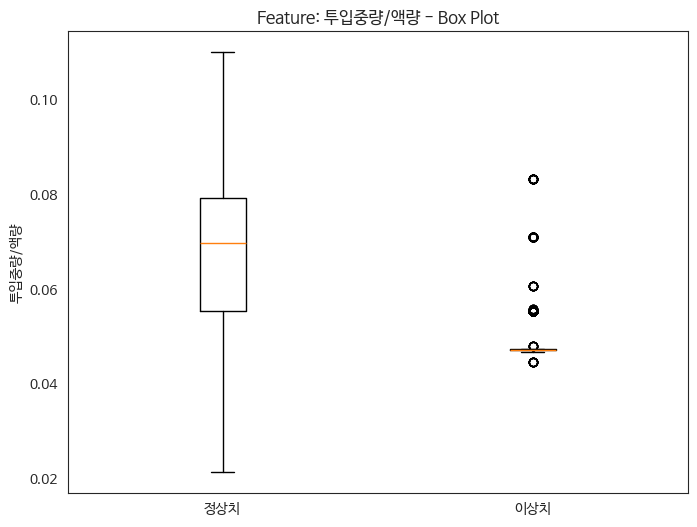

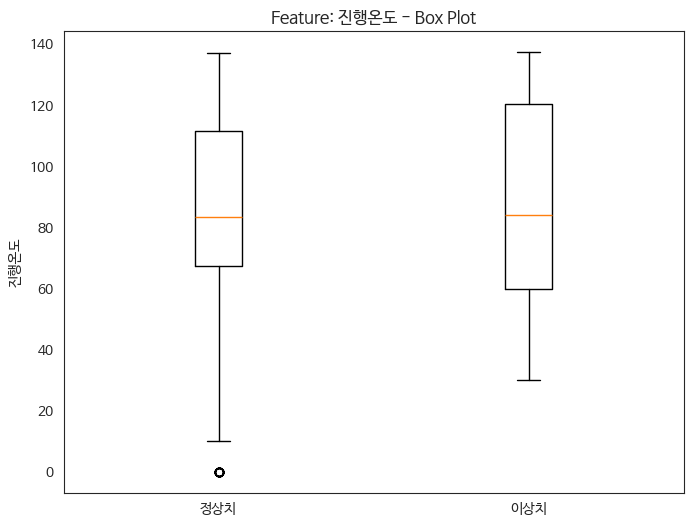

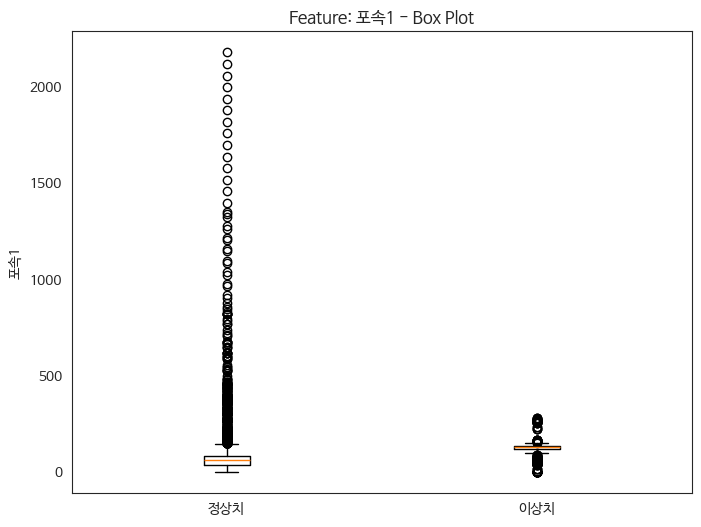

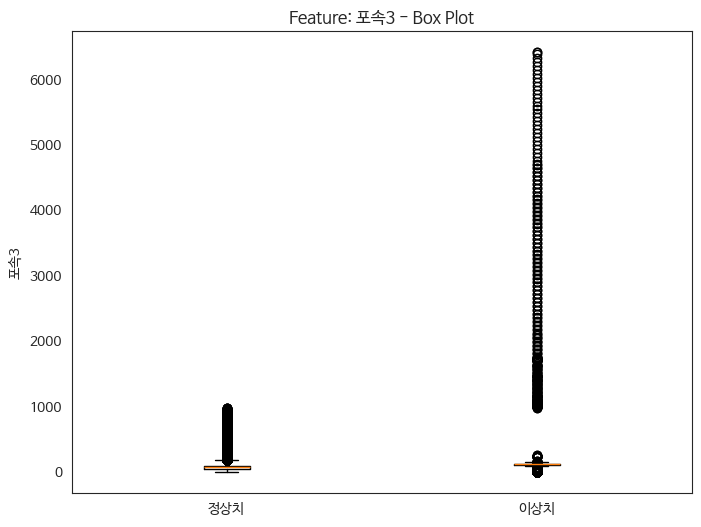

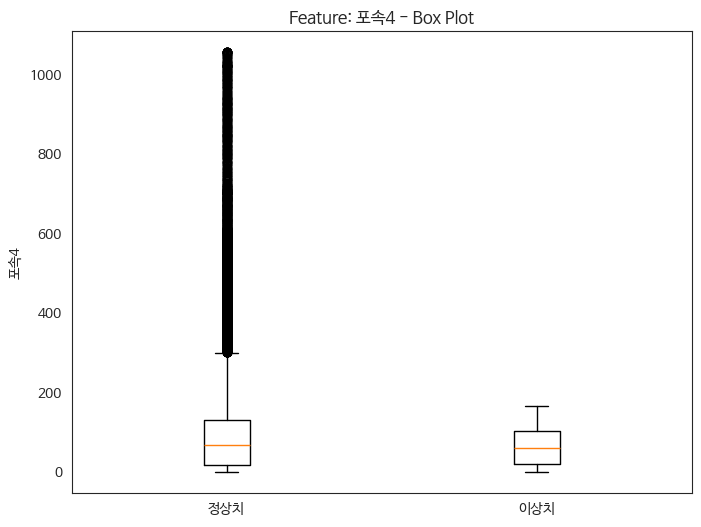

In [ ]:
# 이상치 여부 기준으로 데이터 나누기
data = data.select_dtypes(include=['float64', 'int64'])
normal_data = data[data['이상치 여부'] == 0]
abnormal_data = data[data['이상치 여부'] == 1]

features = data.columns.drop('이상치 여부')

for feature in features:
    plt.figure(figsize=(8, 6))
    plt.boxplot([normal_data[feature], abnormal_data[feature]], labels=['정상치', '이상치'])
    plt.title(f"Feature: {feature} - Box Plot")
    plt.ylabel(feature)
    plt.show()

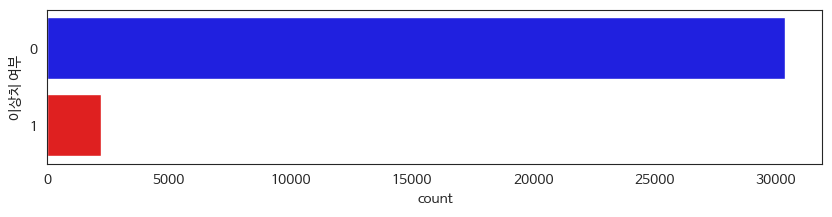

In [11]:
plt.figure(figsize=(10,2))
fig = sns.countplot(y=data['이상치 여부'], data=data, palette=["blue", "red"])
plt.show()

In [12]:
data['이상치 여부'].value_counts()

,count
이상치 여부,
0,30395
1,2213


정규화

In [13]:
data2=data.copy()

In [14]:
data=data.drop('이상치 여부',axis=1)

In [15]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [16]:
data['이상치 여부']=data2['이상치 여부']

In [17]:
data.head()

,단위중량(kg),투입중량(kg),염색길이(m),투입중량/길이,투입중량/액량,진행온도,포속1,포속3,포속4,이상치 여부
0,-0.771119,-1.056715,-0.541904,-0.275682,-1.23847,-2.362133,-1.044040,-0.413491,-0.805339,0
1,-0.771119,-1.056715,-0.541904,-0.275682,-1.23847,-2.381310,-0.799584,-0.357696,-0.797216,0
2,-0.771119,-1.056715,-0.541904,-0.275682,-1.23847,-2.381310,-0.005102,-0.357696,-0.797216,0
3,-0.771119,-1.056715,-0.541904,-0.275682,-1.23847,-2.384506,0.010176,0.067738,-0.789094,0
4,-0.771119,-1.056715,-0.541904,-0.275682,-1.23847,-2.365329,0.010176,0.067738,-0.789094,0


Train, validation, test set 분리

In [25]:
normal_data = data[data['이상치 여부'] == 0]
abnormal_data = data[data['이상치 여부'] == 1]

# 2. Train 데이터: 정상 데이터의 60% 사용
train_normal, remaining_normal = train_test_split(normal_data, test_size=0.2, random_state=20)

# 3. Validation/Test 데이터 분리
# 남은 정상 데이터를 50:50으로 나눔
val_normal, normal_data = train_test_split(remaining_normal, test_size=0.5, random_state=20)
test_normal = normal_data.sample(n=1677, random_state=20)

# 이상 데이터를 50:50으로 나눔 (Validation/Test 각각 20% 비율)
val_abnormal = abnormal_data.sample(n=536, random_state=20)  # 이상치 10% -> Validation 20%
abnormal_data=abnormal_data.drop(val_abnormal.index)
test_abnormal = abnormal_data.sample(n=1677, random_state=20)

# Validation/Test 세트 구성
train_set=train_normal
validation_set = pd.concat([val_normal, val_abnormal])
test_set = pd.concat([test_normal, test_abnormal])

# 데이터 섞기
train_set=train_set.sample(frac=1, random_state=20).reset_index(drop=True)
validation_set = validation_set.sample(frac=1, random_state=20).reset_index(drop=True)
test_set = test_set.sample(frac=1, random_state=20).reset_index(drop=True)

# 결과 확인
print("Train set 정상 데이터 개수:", len(train_normal))
print("Validation set: 정상 =", len(val_normal), ", 이상 =", len(val_abnormal))
print("Test set: 정상 =", len(test_normal), ", 이상 =", len(test_abnormal))

Train set 정상 데이터 개수: 24316
Validation set: 정상 = 3039 , 이상 = 536
Test set: 정상 = 1677 , 이상 = 1677


In [26]:
# test 데이터 셋 => X_test, y_test 분할
X_test = test_set[test_set.columns.difference(['이상치 여부'])]
y_test = test_set["이상치 여부"]

print('X_test:', X_test.shape, 'y_test:', y_test.shape)

X_test: (3354, 9) y_test: (3354,)


In [27]:
X_val = validation_set[validation_set.columns.difference(['이상치 여부'])]
y_val = validation_set["이상치 여부"]

print('X_val:', X_val.shape, 'y_val:', y_val.shape)

X_val: (3575, 9) y_val: (3575,)


In [28]:
# train 데이터 셋 => X_train, y_train 분할
X_train = train_set[train_set.columns.difference(['이상치 여부'])]
y_train = train_set["이상치 여부"]

print('X_train:', X_train.shape, 'y_train:', y_train.shape)

X_train: (24316, 9) y_train: (24316,)


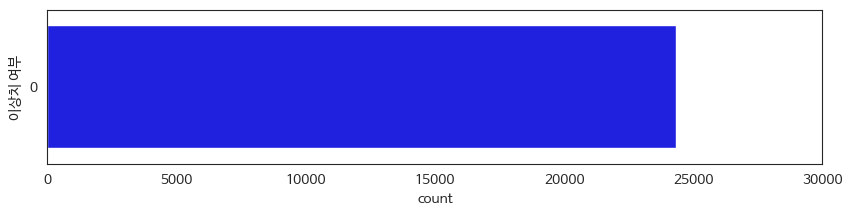

In [29]:
# train 데이터셋은 정상 데이터로만 구성
plt.figure(figsize=(10,2))
fig = sns.countplot(y=train_set['이상치 여부'], data=train_set, palette=["blue"])
plt.xlim(0, 30000)
plt.show()

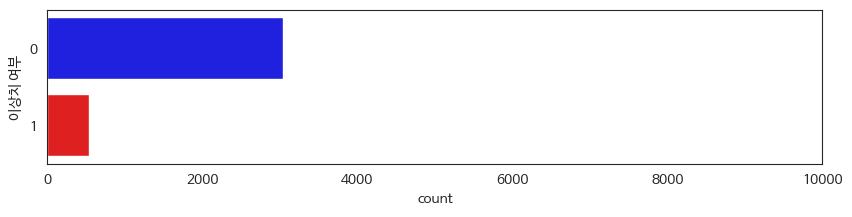

In [30]:
# val dataset은 정상과 이상 일대일 비율로 구성
plt.figure(figsize=(10,2))
fig = sns.countplot(y=validation_set['이상치 여부'], data=validation_set, palette=["blue", "red"])
plt.xlim(0, 10000)
plt.show()

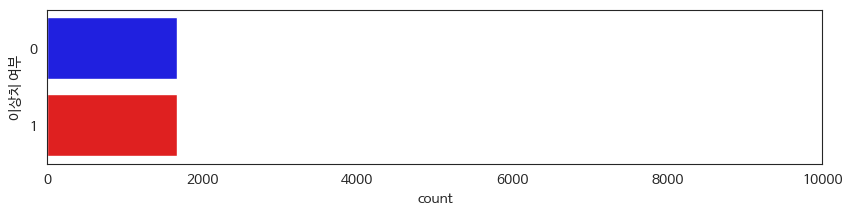

In [31]:
# test dataset은 정상과 이상 일대일 비율로 구성
plt.figure(figsize=(10,2))
fig = sns.countplot(y=test_set['이상치 여부'], data=test_set, palette=["blue", "red"])
plt.xlim(0, 10000)
plt.show()

# Model

## 1. LOF

In [37]:
# LOF 모델 구축
LOF = LocalOutlierFactor(novelty=True,contamination=0.1)
LOF.fit(X_train)

LocalOutlierFactor(contamination=0.1, novelty=True)

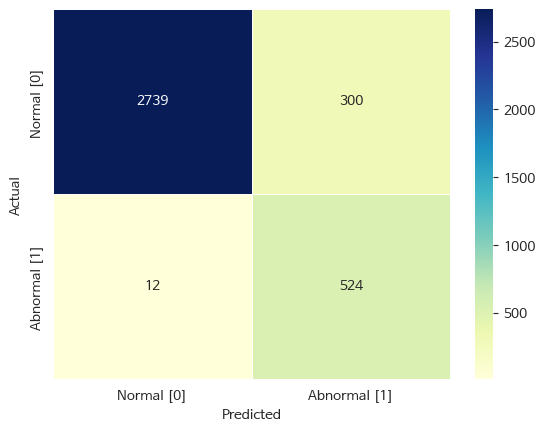

In [38]:
LOF_val_pred = LOF.predict(X_val)

LOF_val_pred = pd.DataFrame(LOF_val_pred)
LOF_val_pred = LOF_val_pred.replace({-1: 1, 1: 0})

# Confusion matrix
con_mat = confusion_matrix(y_val, LOF_val_pred)
sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [39]:
print("accuracy: ", accuracy_score(y_val, LOF_val_pred))
print("recall: ", round(recall_score(y_val, LOF_val_pred),3))
print("precision: ", round(precision_score(y_val, LOF_val_pred),3))
print("f1-score: ", round(f1_score(y_val, LOF_val_pred),3))

accuracy:  0.9127272727272727
recall:  0.978
precision:  0.636
f1-score:  0.771


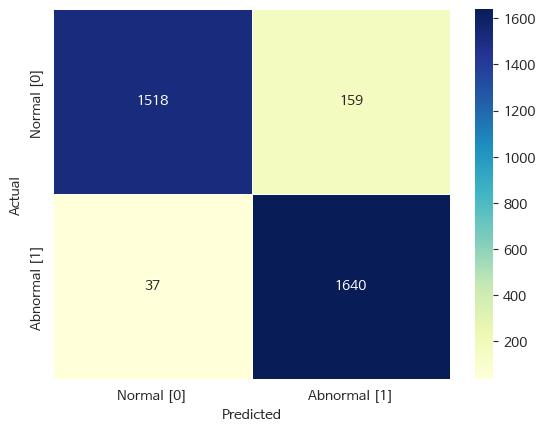

In [40]:
LOF_test_pred = LOF.predict(X_test)

LOF_test_pred = pd.DataFrame(LOF_test_pred)
LOF_test_pred = LOF_test_pred.replace({-1: 1, 1: 0})

# Confusion matrix
con_mat = confusion_matrix(y_test, LOF_test_pred)
sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [41]:
print("accuracy: ", accuracy_score(y_test, LOF_test_pred))
print("recall: ", round(recall_score(y_test, LOF_test_pred),3))
print("precision: ", round(precision_score(y_test, LOF_test_pred),3))
print("f1-score: ", round(f1_score(y_test, LOF_test_pred),3))

accuracy:  0.9415623136553369
recall:  0.978
precision:  0.912
f1-score:  0.944


## 1-1.LOF 하이퍼파라미터 개선

In [46]:
def lof_grid_search(X_train, y_train, X_val, y_val, param_grid):
    best_score = -1
    best_params = None
    best_model = None

    for params in ParameterGrid(param_grid):
        contamination = params['contamination']

        # 'auto' 처리
        if contamination == 'auto':
            clf = LocalOutlierFactor(
                novelty=True,
                n_neighbors=params['n_neighbors'],
                contamination='auto',
                leaf_size=params['leaf_size'],
                p=params['p']
            )
        else:
            clf = LocalOutlierFactor(
                novelty=True,
                n_neighbors=params['n_neighbors'],
                contamination=contamination,
                leaf_size=params['leaf_size'],
                p=params['p']
            )

        clf.fit(X_train)

        y_pred_val = clf.predict(X_val)
        y_pred_val = (y_pred_val == -1).astype(int)
        score = f1_score(y_val, y_pred_val)

        if score > best_score:
            best_score = score
            best_params = params
            best_model = clf

    return best_model, best_params, best_score

param_grid = {
    'n_neighbors': [10, 20, 30],
    'contamination': [0.1, 0.2, 'auto'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

best_model, best_params, best_score = lof_grid_search(X_train, y_train, X_val, y_val, param_grid)

print("Best Parameters:", best_params)

Best Parameters: {'contamination': 'auto', 'leaf_size': 20, 'n_neighbors': 30, 'p': 2}


In [47]:
LOF_advanced = LocalOutlierFactor(novelty=True,contamination='auto',leaf_size=20,n_neighbors=30,p=2)
LOF_advanced.fit(X_train)

LocalOutlierFactor(leaf_size=20, n_neighbors=30, novelty=True)

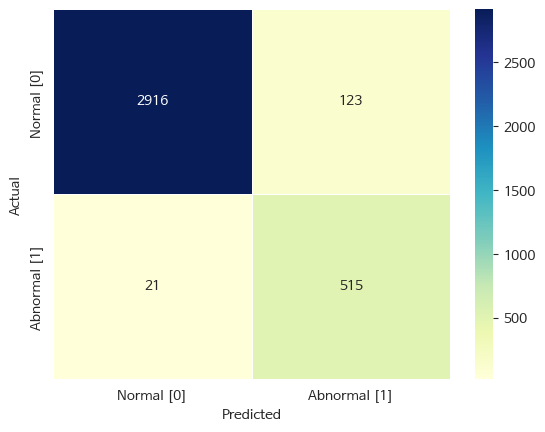

In [48]:
LOF_val_pred = LOF_advanced.predict(X_val)

LOF_val_pred = pd.DataFrame(LOF_val_pred)
LOF_val_pred = LOF_val_pred.replace({-1: 1, 1: 0})

con_mat = confusion_matrix(y_val, LOF_val_pred)
sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [49]:
print("accuracy: ", accuracy_score(y_val, LOF_val_pred))
print("recall: ", round(recall_score(y_val, LOF_val_pred),3))
print("precision: ", round(precision_score(y_val, LOF_val_pred),3))
print("f1-score: ", round(f1_score(y_val, LOF_val_pred),3))

accuracy:  0.9597202797202797
recall:  0.961
precision:  0.807
f1-score:  0.877


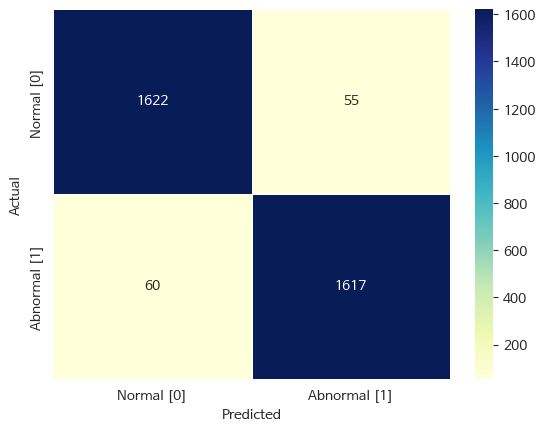

In [50]:
LOF_test_pred = LOF_advanced.predict(X_test)

LOF_test_pred = pd.DataFrame(LOF_test_pred)
LOF_test_pred = LOF_test_pred.replace({-1: 1, 1: 0})

con_mat = confusion_matrix(y_test, LOF_test_pred)
sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [51]:
print("accuracy: ", accuracy_score(y_test, LOF_test_pred))
print("recall: ", round(recall_score(y_test, LOF_test_pred),3))
print("precision: ", round(precision_score(y_test, LOF_test_pred),3))
print("f1-score: ", round(f1_score(y_test, LOF_test_pred),3))

accuracy:  0.9657125819916518
recall:  0.964
precision:  0.967
f1-score:  0.966


### 2. IsoForest

In [52]:
# Isolation Forest 모델 구축
IF = IsolationForest(random_state=42)
IF.fit(X_train)

IsolationForest(random_state=42)

In [53]:
IF_val_pred = IF.predict(X_val)

IF_val_pred = pd.DataFrame(IF_val_pred)
IF_val_pred = IF_val_pred.replace({-1: 1, 1: 0})

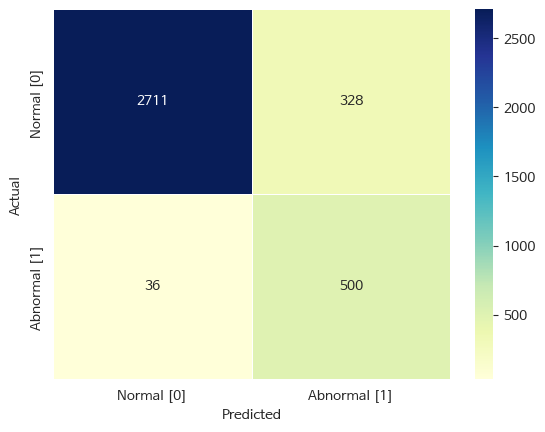

In [54]:
# Confusion matrix 출력
con_mat_IF = confusion_matrix(y_val, IF_val_pred)

sns.heatmap(pd.DataFrame(con_mat_IF, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [55]:
print("accuracy: ", accuracy_score(y_val, IF_val_pred))
print("recall: ", round(recall_score(y_val, IF_val_pred),3))
print("precision: ", round(precision_score(y_val, IF_val_pred),3))
print("f1-score: ", round(f1_score(y_val, IF_val_pred),3))

accuracy:  0.8981818181818182
recall:  0.933
precision:  0.604
f1-score:  0.733


In [56]:
IF_test_pred = IF.predict(X_test)

IF_test_pred = pd.DataFrame(IF_test_pred)
IF_test_pred = IF_test_pred.replace({-1: 1, 1: 0})

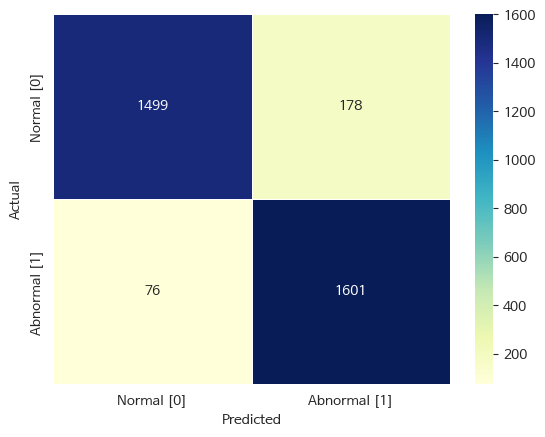

In [57]:
# Confusion matrix
con_mat_IF = confusion_matrix(y_test, IF_test_pred)

sns.heatmap(pd.DataFrame(con_mat_IF, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [58]:
print("accuracy: ", accuracy_score(y_test, IF_test_pred))
print("recall: ", round(recall_score(y_test, IF_test_pred),3))
print("precision: ", round(precision_score(y_test, IF_test_pred),3))
print("f1-score: ", round(f1_score(y_test, IF_test_pred),3))

accuracy:  0.9242695289206917
recall:  0.955
precision:  0.9
f1-score:  0.927


## 2-1.Isolation Forest 하이퍼파라미터 개선

In [ ]:
param_grid = {
    "n_estimators": [70, 80, 90],
    "max_samples": [0.5, 0.7, 1.0],
    "max_features": [0.5, 0.7, 1.0],
    "bootstrap": [True, False],
    "contamination": [0.04, 0.1, 0.16],
}

IF = IsolationForest(random_state=42)
grid_search = GridSearchCV(IF, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train)
grid_search.best_params_

{'bootstrap': True,
 'contamination': 0.04,
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 70}

In [59]:
#하이퍼파라미터 수정
IF_advanced =  IsolationForest(random_state=42, bootstrap=True, max_features=0.5, max_samples=0.5, n_estimators=70, contamination=0.04)
IF_advanced.fit(X_train)

IsolationForest(bootstrap=True, contamination=0.04, max_features=0.5,
                max_samples=0.5, n_estimators=70, random_state=42)

In [60]:
IF_val_pred = IF_advanced.predict(X_val)

IF_val_pred = pd.DataFrame(IF_val_pred)
IF_val_pred = IF_val_pred.replace({-1: 1, 1: 0})

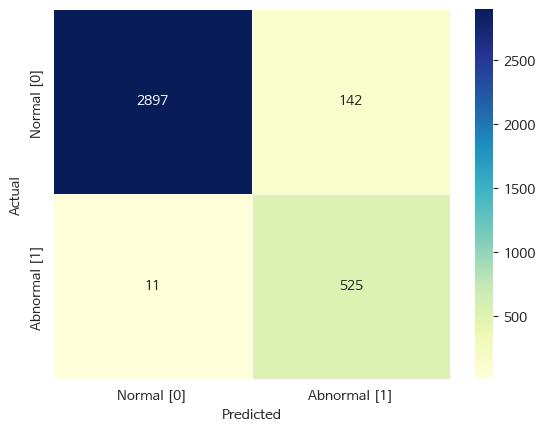

In [61]:
con_mat_IF = confusion_matrix(y_val, IF_val_pred)

sns.heatmap(pd.DataFrame(con_mat_IF, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [62]:
print("accuracy: ", accuracy_score(y_val, IF_val_pred))
print("recall: ", round(recall_score(y_val, IF_val_pred),3))
print("precision: ", round(precision_score(y_val, IF_val_pred),3))
print("f1-score: ", round(f1_score(y_val, IF_val_pred),3))

accuracy:  0.9572027972027972
recall:  0.979
precision:  0.787
f1-score:  0.873


In [63]:
IF_test_pred = IF_advanced.predict(X_test)

IF_test_pred = pd.DataFrame(IF_test_pred)
IF_test_pred = IF_test_pred.replace({-1: 1, 1: 0})

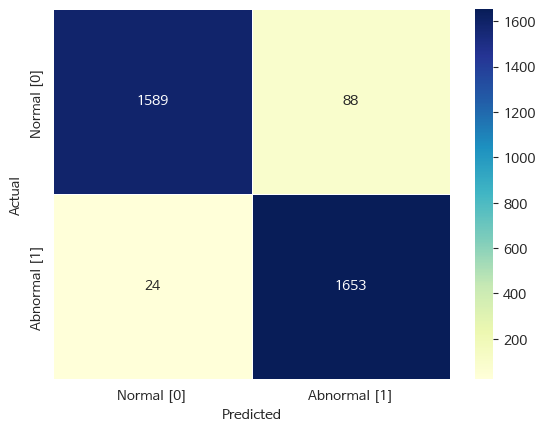

In [64]:
con_mat_IF = confusion_matrix(y_test, IF_test_pred)

sns.heatmap(pd.DataFrame(con_mat_IF, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [65]:
print("accuracy: ", accuracy_score(y_test, IF_test_pred))
print("recall: ", round(recall_score(y_test, IF_test_pred),3))
print("precision: ", round(precision_score(y_test, IF_test_pred),3))
print("f1-score: ", round(f1_score(y_test, IF_test_pred),3))

accuracy:  0.9666070363744782
recall:  0.986
precision:  0.949
f1-score:  0.967


## 3.KDE

In [80]:
from sklearn.neighbors import KernelDensity
import numpy as np

In [81]:
kde = KernelDensity()
kde.fit(X_train)

KernelDensity()

In [82]:
log_density = kde.score_samples(X_val)
threshold = np.percentile(log_density,  14)
kde_val_pred = (log_density < threshold).astype(int)

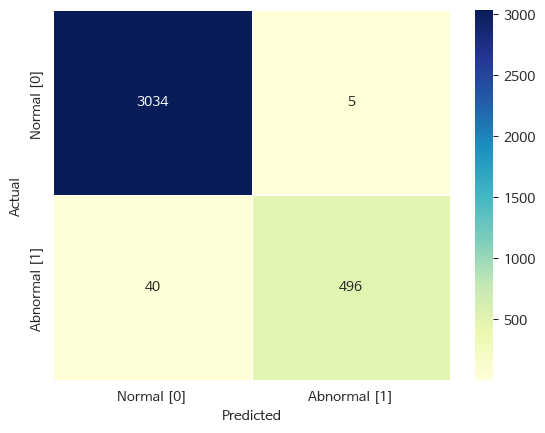

In [83]:
con_mat_kde = confusion_matrix(y_val, kde_val_pred)
sns.heatmap(pd.DataFrame(con_mat_kde, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [84]:
accuracy = accuracy_score(y_val, kde_val_pred)
precision = precision_score(y_val, kde_val_pred)
recall = recall_score(y_val, kde_val_pred)
f1 = f1_score(y_val, kde_val_pred)
print("accuracy: ", accuracy_score(y_val, kde_val_pred))
print("recall: ", round(recall_score(y_val, kde_val_pred),3))
print("precision: ", round(precision_score(y_val, kde_val_pred),3))
print("f1-score: ", round(f1_score(y_val, kde_val_pred),3))

accuracy:  0.9874125874125874
recall:  0.925
precision:  0.99
f1-score:  0.957


In [85]:
log_density = kde.score_samples(X_test)
threshold = np.percentile(log_density,  10)
kde_test_pred = (log_density < threshold).astype(int)

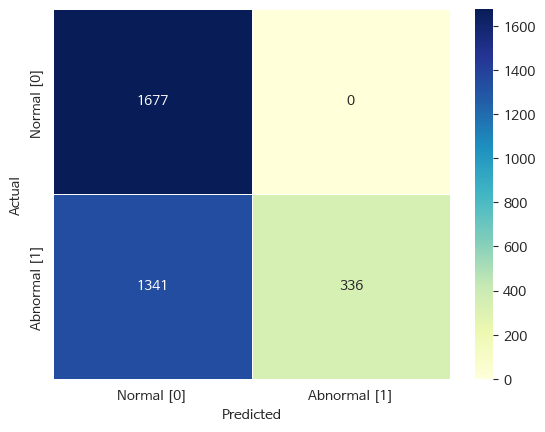

In [86]:
con_mat_kde = confusion_matrix(y_test, kde_test_pred)
sns.heatmap(pd.DataFrame(con_mat_kde, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [87]:
accuracy = accuracy_score(y_test, kde_test_pred)
precision = precision_score(y_test, kde_test_pred)
recall = recall_score(y_test, kde_test_pred)
f1 = f1_score(y_test, kde_test_pred)
print("accuracy: ", accuracy_score(y_test, kde_test_pred))
print("recall: ", round(recall_score(y_test, kde_test_pred),3))
print("precision: ", round(precision_score(y_test, kde_test_pred),3))
print("f1-score: ", round(f1_score(y_test, kde_test_pred),3))

accuracy:  0.6001788908765653
recall:  0.2
precision:  1.0
f1-score:  0.334


## 3-1 KDE 하이퍼파라미터 개선

In [106]:
def kde_outlier_detection(X_train, X_val, kernel, bandwidth, threshold_percentile):
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)
    kde.fit(X_train)
    log_density = kde.score_samples(X_val)
    threshold = np.percentile(log_density, threshold_percentile)
    y_pred = (log_density < threshold).astype(int)
    return y_pred

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1


param_grid = {
    'threshold_percentile': [10, 20, 30, 40,50],
    'kernel': ['gaussian', 'exponential', 'tophat', 'epanechnikov'],
    'bandwidth': [0.1, 0.5, 1.0, 2.0, 5.0]
}


def grid_search(X_train, X_val, y_val):
    best_f1 = 0
    best_params = None
    for threshold in param_grid['threshold_percentile']:
        for kernel in param_grid['kernel']:
            for bandwidth in param_grid['bandwidth']:
                y_pred = kde_outlier_detection(X_train, X_val, kernel, bandwidth, threshold)
                accuracy, precision, recall, f1 = evaluate_model(y_val, y_pred)
                if f1 > best_f1:
                    best_f1 = f1
                    best_params = {'threshold_percentile': threshold, 'kernel': kernel, 'bandwidth': bandwidth}
    return best_params

best_params = grid_search(X_train, X_val, y_val)
print(f"Best parameters: {best_params}")

Best parameters: {'threshold_percentile': 50, 'kernel': 'exponential', 'bandwidth': 0.5}


In [107]:
# KDE: 그리드 서치로 파라미터 튜닝
kde_advanced = KernelDensity(kernel='gaussian', bandwidth=0.5)
kde_advanced.fit(X_train)

KernelDensity(bandwidth=0.5)

In [108]:
log_density = kde_advanced.score_samples(X_val)
threshold = np.percentile(log_density,  50)
kde_val_pred = (log_density < threshold).astype(int)

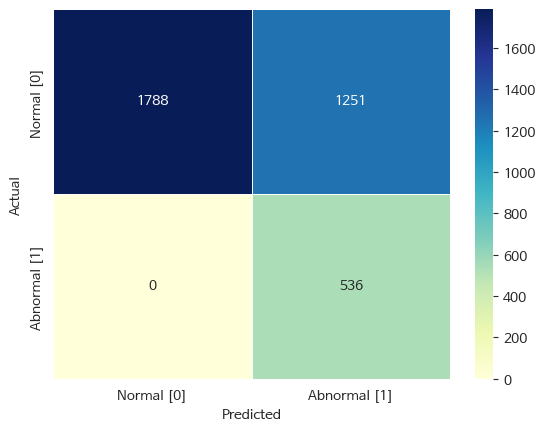

In [109]:
con_mat_kde = confusion_matrix(y_val, kde_val_pred)
sns.heatmap(pd.DataFrame(con_mat_kde, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [110]:
accuracy = accuracy_score(y_val, kde_val_pred)
precision = precision_score(y_val, kde_val_pred)
recall = recall_score(y_val, kde_val_pred)
f1 = f1_score(y_val, kde_val_pred)
print("accuracy: ", accuracy_score(y_val, kde_val_pred))
print("recall: ", round(recall_score(y_val, kde_val_pred),3))
print("precision: ", round(precision_score(y_val, kde_val_pred),3))
print("f1-score: ", round(f1_score(y_val, kde_val_pred),3))

accuracy:  0.6500699300699301
recall:  1.0
precision:  0.3
f1-score:  0.461


In [112]:
log_density = kde_advanced.score_samples(X_test)
threshold = np.percentile(log_density, 50)
kde_test_pred = (log_density < threshold).astype(int)

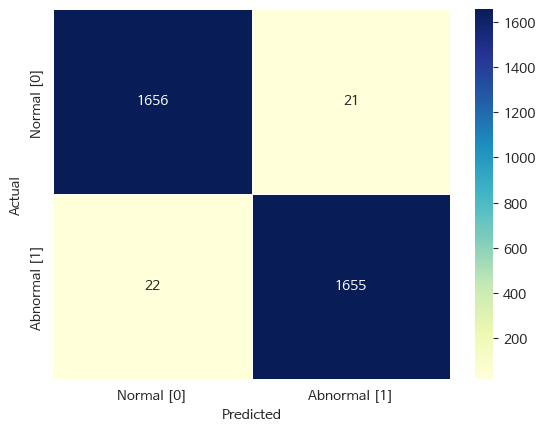

In [113]:
con_mat_kde = confusion_matrix(y_test, kde_test_pred)
sns.heatmap(pd.DataFrame(con_mat_kde, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [114]:
accuracy = accuracy_score(y_test, kde_test_pred)
precision = precision_score(y_test, kde_test_pred)
recall = recall_score(y_test, kde_test_pred)
f1 = f1_score(y_test, kde_test_pred)
print("accuracy: ", accuracy_score(y_test, kde_test_pred))
print("recall: ", round(recall_score(y_test, kde_test_pred),3))
print("precision: ", round(precision_score(y_test, kde_test_pred),3))
print("f1-score: ", round(f1_score(y_test, kde_test_pred),3))

accuracy:  0.9871794871794872
recall:  0.987
precision:  0.987
f1-score:  0.987


## 4. CBLOF 모델

In [164]:
cblof = CBLOF(random_state=128,contamination=0.01)
cblof.fit(X_train)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.01, n_clusters=8, n_jobs=None, random_state=128,
   use_weights=False)

In [165]:
cblof_val_pred = cblof.predict(X_val)
cblof_val_scores = cblof.decision_function(X_val)

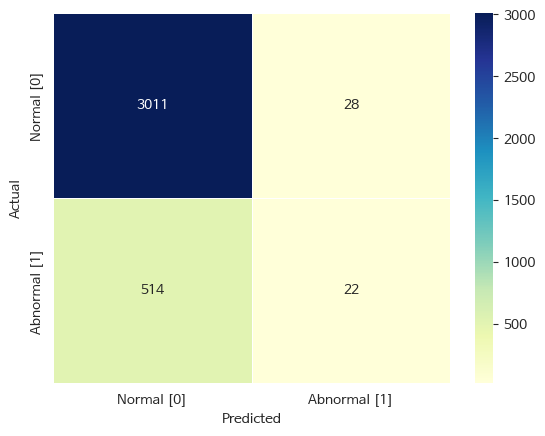

In [166]:
con_mat_cblof = confusion_matrix(y_val, cblof_val_pred)
sns.heatmap(pd.DataFrame(con_mat_cblof, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [167]:
accuracy = accuracy_score(y_val, cblof_val_pred)
precision = precision_score(y_val, cblof_val_pred)
recall = recall_score(y_val, cblof_val_pred)
f1 = f1_score(y_val, cblof_val_pred)
print("accuracy: ", accuracy_score(y_val, cblof_val_pred))
print("recall: ", round(recall_score(y_val, cblof_val_pred),3))
print("precision: ", round(precision_score(y_val, cblof_val_pred),3))
print("f1-score: ", round(f1_score(y_val, cblof_val_pred),3))

accuracy:  0.8483916083916084
recall:  0.041
precision:  0.44
f1-score:  0.075


In [168]:
cblof_test_pred = cblof.predict(X_test)
cblof_test_scores = cblof.decision_function(X_test)

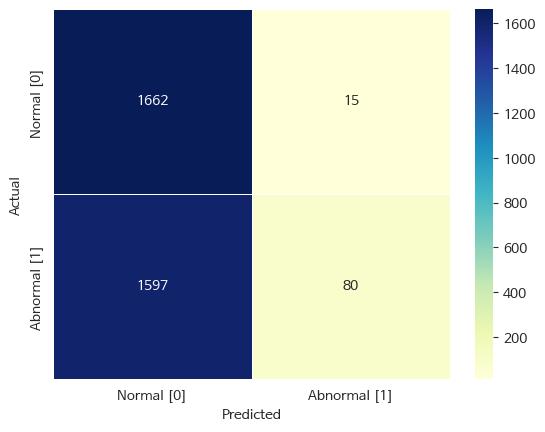

In [169]:
con_mat_cblof = confusion_matrix(y_test, cblof_test_pred)
sns.heatmap(pd.DataFrame(con_mat_cblof, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [170]:
accuracy = accuracy_score(y_test, cblof_test_pred)
precision = precision_score(y_test, cblof_test_pred)
recall = recall_score(y_test, cblof_test_pred)
f1 = f1_score(y_test, cblof_test_pred)
print("accuracy: ", accuracy_score(y_test, cblof_test_pred))
print("recall: ", round(recall_score(y_test, cblof_test_pred),3))
print("precision: ", round(precision_score(y_test, cblof_test_pred),3))
print("f1-score: ", round(f1_score(y_test, cblof_test_pred),3))

accuracy:  0.5193798449612403
recall:  0.048
precision:  0.842
f1-score:  0.09


## 4-1 CBLOF 하이퍼파라미터 개선

In [149]:
cblof = CBLOF(random_state=128)


param_grid = {
    'contamination': [0.05, 0.1, 0.15, 0.2],
    'n_clusters': [2,3,4],
    'alpha': [0.1,0.2,0.3],
    'beta': [2,3,4],
}

grid_search = GridSearchCV(estimator=cblof, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'alpha': 0.1, 'beta': 2, 'contamination': 0.05, 'n_clusters': 2}


In [171]:
# CBLOF: 그리드 서치로 파라미터 튜닝
cblof_advanced = CBLOF(random_state=128,alpha=0.1, beta= 2, contamination= 0.05, n_clusters= 2)
cblof_advanced.fit(X_train)

CBLOF(alpha=0.1, beta=2, check_estimator=False, clustering_estimator=None,
   contamination=0.05, n_clusters=2, n_jobs=None, random_state=128,
   use_weights=False)

In [172]:
cblof_val_pred = cblof_advanced.predict(X_val)
cblof_val_scores = cblof_advanced.decision_function(X_val)

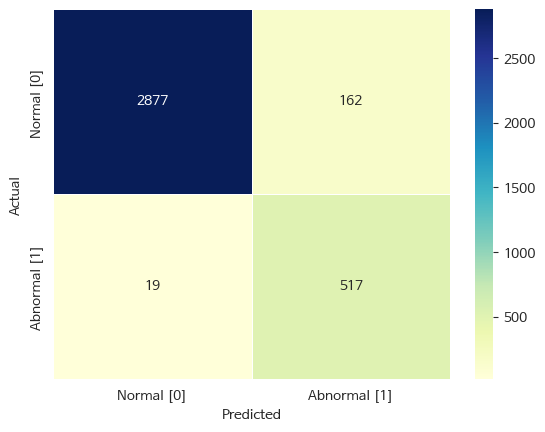

In [173]:
con_mat_cblof = confusion_matrix(y_val, cblof_val_pred)
sns.heatmap(pd.DataFrame(con_mat_cblof, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [174]:
accuracy = accuracy_score(y_val, cblof_val_pred)
precision = precision_score(y_val, cblof_val_pred)
recall = recall_score(y_val, cblof_val_pred)
f1 = f1_score(y_val, cblof_val_pred)
print("accuracy: ", accuracy_score(y_val, cblof_val_pred))
print("recall: ", round(recall_score(y_val, cblof_val_pred),3))
print("precision: ", round(precision_score(y_val, cblof_val_pred),3))
print("f1-score: ", round(f1_score(y_val, cblof_val_pred),3))

accuracy:  0.9493706293706293
recall:  0.965
precision:  0.761
f1-score:  0.851


In [175]:
cblof_test_pred = cblof_advanced.predict(X_test)
cblof_test_scores = cblof_advanced.decision_function(X_test)

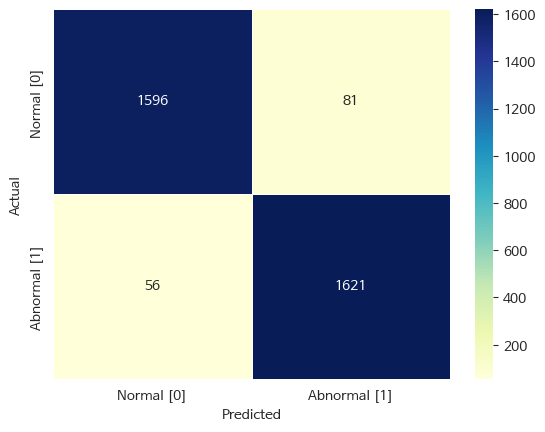

In [176]:
con_mat_cblof = confusion_matrix(y_test, cblof_test_pred)
sns.heatmap(pd.DataFrame(con_mat_cblof, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [177]:
accuracy = accuracy_score(y_test, cblof_test_pred)
precision = precision_score(y_test, cblof_test_pred)
recall = recall_score(y_test, cblof_test_pred)
f1 = f1_score(y_test, cblof_test_pred)
print("accuracy: ", accuracy_score(y_test, cblof_test_pred))
print("recall: ", round(recall_score(y_test, cblof_test_pred),3))
print("precision: ", round(precision_score(y_test, cblof_test_pred),3))
print("f1-score: ", round(f1_score(y_test, cblof_test_pred),3))

accuracy:  0.9591532498509243
recall:  0.967
precision:  0.952
f1-score:  0.959


# XAI

## LOF알고리즘에 XAI기법 적용

In [ ]:
random_state = 166
np.random.seed(random_state)
sample_idx = np.random.choice(len(X_test), size=50, replace=False)
X_test_sampled = X_test.iloc[sample_idx]

In [ ]:
# LOF 모델 구축
LOF_advanced = LocalOutlierFactor(novelty=True,contamination='auto',leaf_size=20,n_neighbors=30,p=2)
LOF_advanced.fit(X_train)

LOF_advanced_scores = LOF_advanced.decision_function(X_test)

shap_explainer = shap.Explainer(LOF_advanced.decision_function, X_test_sampled)
shap_values = shap_explainer(X_test_sampled)

ExactExplainer explainer: 101it [08:45,  5.30s/it]


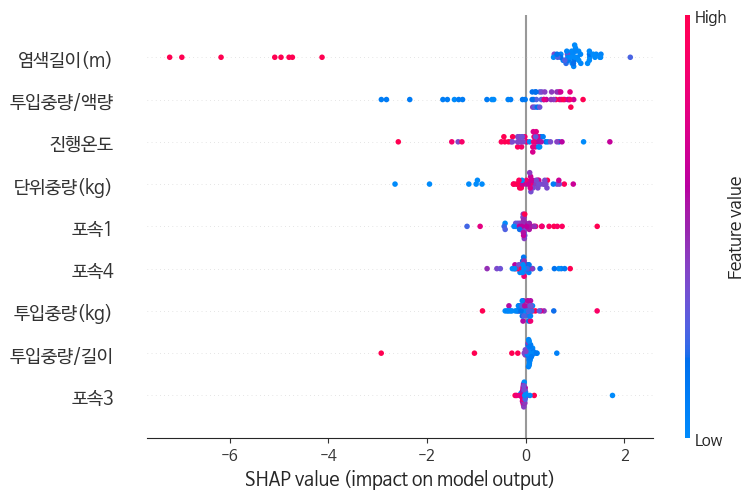

In [ ]:
# SHAP Summary Plot
shap.summary_plot(shap_values, X_test_sampled)

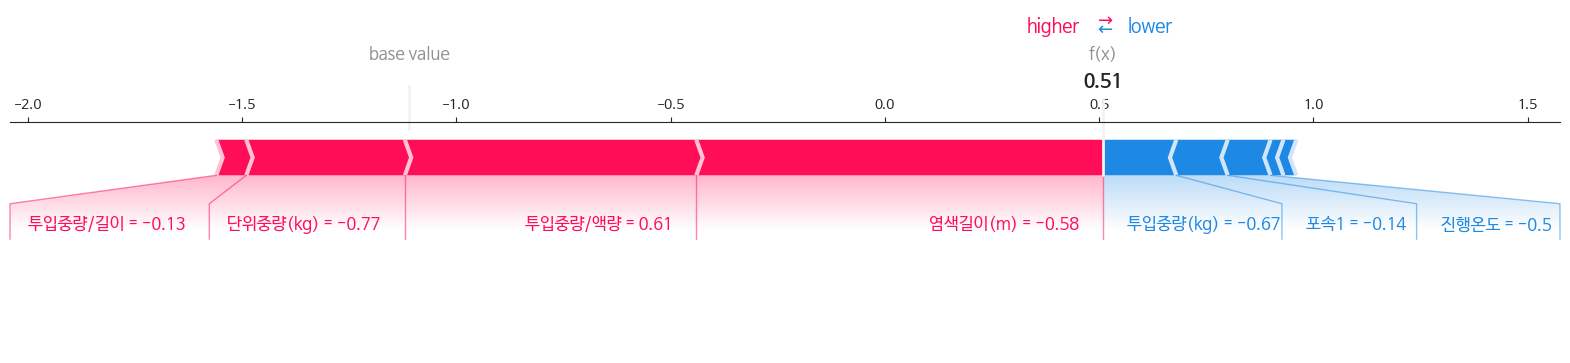

In [ ]:
idx = 12

features_rounded = np.round(X_test_sampled.iloc[idx], 2)

# Static Force Plot
shap.force_plot(
    base_value=np.round(shap_values.base_values[idx], 2),
    shap_values=np.round(shap_values.values[idx], 2),
    features=features_rounded,
    feature_names=X_test.columns,
    matplotlib=True
)

## isolation Forest알고리즘 XAI기법 적용

In [ ]:
IF_advanced =  IsolationForest(random_state=42, bootstrap=True, max_features=0.5, max_samples=0.5, n_estimators=70, contamination=0.04)
IF_advanced.fit(X_train)

IF_advanced_scores = IF_advanced.decision_function(X_test)

shap_explainer = shap.TreeExplainer(IF_advanced)
shap_values = shap_explainer.shap_values(X_test_sampled)

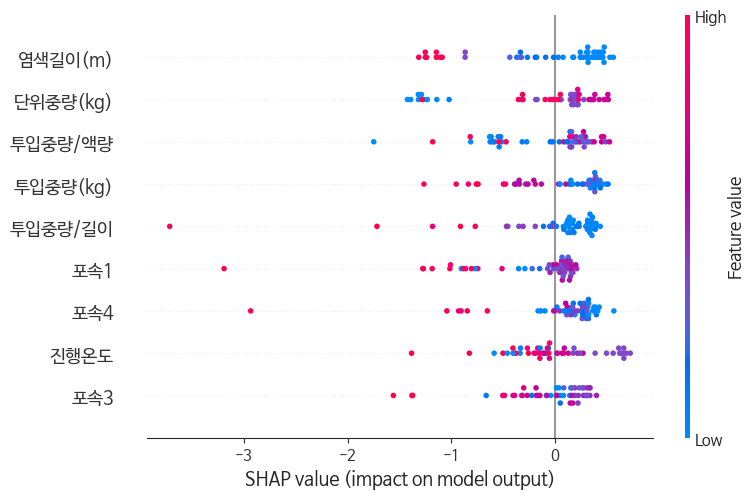

In [ ]:
# SHAP Summary Plot
shap.summary_plot(shap_values1, X_test_sampled)

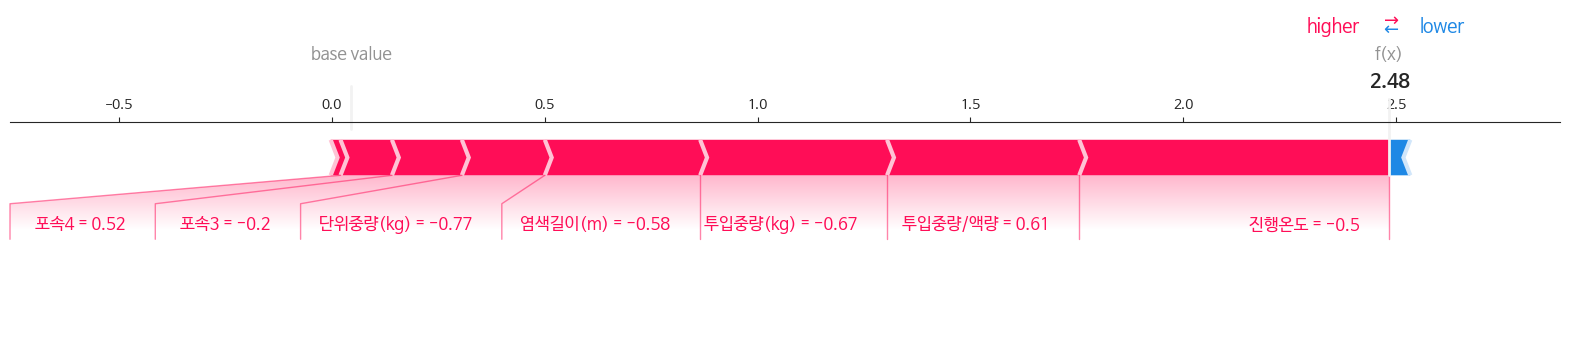

In [ ]:
idx = 12

features_rounded = np.round(X_test_sampled.iloc[idx], 2)

base_value = np.mean(IF_advanced_scores)

# Static Force Plot 생성 및 저장
shap.force_plot(
    base_value=base_value,
    shap_values=shap_values1[idx],
    features=features_rounded,
    feature_names=X_test.columns,
    matplotlib=True
)